In [1]:
from tqdm import tqdm

# %matplotlib notebook
from keithley2600 import Keithley2600
from pmu_som import pmu_ctrl, pmu_cal, pmu_calc, pmu_def,pmu_calc_jub,pmu_def_jub ,pmu_cal,pmu_cal_jub
from time import sleep
import numpy as np
from matplotlib import pyplot as plt


try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()

k.smua.measure.nplc = 3 # 0.001 to 25
k.smub.measure.nplc = 25 # 0.001 to 25
#k.smua.sense = k.smua.SENSE_REMOTE

# k.smua.source.highc = k.smua.ENABLE
#k.smua.sense = k.smua.SENSE_REMOTE
k.smua.source.output = k.smua.OUTPUT_OFF
k.smub.source.output = k.smub.OUTPUT_OFF
k.display.screen = k.display.USER
k.display.clear()
k.display.settext("Ready to do $BStuff$N")
k.display.settext("ctrl from calibrate.ipynb")

k.beeper.enable = k.beeper.ON
#k.play_chord(notes=("G5", "F5", "C5", "C5"), durations=0.1)
# k.beeper.enable = k.beeper.OFF

p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1,
    "GAIN"      : 0b10,
    "TMP ENABLE": 1,
    "TMP"       : 0b11
})

3

In [2]:
zero_val = 0x4800

# offset_val = round(zero_val * 4.5 / 3.5)
offset_val = round(zero_val * 9 / 7)

print("Offset_value = 0x%04X" % (offset_val))
print("Min = %.3fV" % (pmu_calc.dac_to_v(0x0000, offset_val)))
print("1/4 = %.3fV" % (pmu_calc.dac_to_v(0x4000, offset_val)))
print("Mid = %.3fV" % (pmu_calc.dac_to_v(0x8000, offset_val)))
print("Max = %.3fV" % (pmu_calc.dac_to_v(0xFFFF, offset_val)))

for i in range(4):
    p.channels[i].write_dac(offset_val ,"Offset")

Offset_value = 0x5C92
Min = -6.265V
1/4 = -0.696V
Mid = 4.873V
Max = 16.010V


In [3]:
# set pmu-offset value
# new_offset_value = 0x5249

# read offset
for i in range(4):
    print("CH%i = 0x%X" % (i, p.channels[i].read_dac("Offset")))

CH0 = 0xFFFF
CH1 = 0xFFFF
CH2 = 0xFFFF
CH3 = 0xFFFF


In [2]:
# pmu_cal.cal_FIN_I_C(p,k,0,"20u")
# pmu_cal.cal_FIN_I_M(p,k,0,"20u")
# cal_data = pmu_cal.calibrate(p,k,max_iterations=20,accuracy=1, wait_before_measure=0.5, reset_pmu=True)
cal_data = pmu_cal.calibrate(p,k,max_iterations=20,accuracy=0, wait_before_measure=2, reset_pmu=False)
# k.play_chord(notes=("F#5", "G#5", "A5", "B5", "C#5", "D5", "E5"), durations=0.1)
# p.reset()
# cal_data

FIN_U_M CALIBRATION for channel 0
	NEW_FIN_M = FIN_U_M * (V_HIGH_SET / V_HIGH_MEAS)
	64875 = 65535 * (11.137 V / 11.251 V)


KeyboardInterrupt: 

In [2]:
cal_data_jub = pmu_cal_jub.test_calibrate_jub_FIN_I_M(p,k,max_iterations=1,accuracy=0,wait_before_measure=.5,reset_pmu=False)

FIN_U_M CALIBRATION for channel 0

FIN_U_M 65535

slope_Max 0.00034313740653706473

slope_Ideal 0.00033988952636718753

slope_Min 0.0001716246455275124
[64914.50220788]

Offset after Interpolation [64914.50220788]
	V_MAX after Cal = 11.042 V
FIN_U_C CALIBRATION for channel 0
	NEW_FIN_C , FIN_C 
	65535 = 32768 )
	Offset after Cal = 11.149 V

dacc_zero 65535

dac_one 32768

volt_zero 11.14882

volt_one -0.09489990000000001

v_req 7.5531005859375e-05
The offset for output voltage 7.5531005859375e-05 is approximately 33045.000000000000000.
	Offset after Cal = 186.098 µV

 debug print FIN_U_C  33045

 debug print FIN_U_M  [64914.50220788]
FIN_U_M CALIBRATION for channel 1

FIN_U_M 65535

slope_Max 0.00034315235572374646

slope_Ideal 0.00033988952636718753

slope_Min 0.00017163412579729607
[64911.66608633]

Offset after Interpolation [64911.66608633]
	V_MAX after Cal = 11.045 V
FIN_U_C CALIBRATION for channel 1
	NEW_FIN_C , FIN_C 
	65535 = 32768 )
	Offset after Cal = 11.153 V

dacc_zero 6553

ValueError: not enough values to unpack (expected 2, got 1)

In [3]:

print(cal_data_jub)

{'0FIN_U_M': array([64938.24827148]), '0FIN_U_C': 33033, '1FIN_U_M': array([64912.09165853]), '1FIN_U_C': 33077, '2FIN_U_M': array([64942.27873411]), '2FIN_U_C': 33010, '3FIN_U_M': array([64932.89314658]), '3FIN_U_C': 33042, '0FIN_I_M_5u': array([64616.85261622]), '0FIN_I_C_5u': 33240, '1FIN_I_M_5u': array([64651.89762129]), '1FIN_I_C_5u': 33263, '2FIN_I_M_5u': array([64629.10794953]), '2FIN_I_C_5u': 33168, '3FIN_I_M_5u': array([64660.0349547]), '3FIN_I_C_5u': 33193, '0FIN_I_M_20u': array([64697.28220273]), '0FIN_I_C_20u': 33165, '1FIN_I_M_20u': array([64717.93911261]), '1FIN_I_C_20u': 33193, '2FIN_I_M_20u': array([64702.04727272]), '2FIN_I_C_20u': 33098, '3FIN_I_M_20u': array([64732.00718343]), '3FIN_I_C_20u': 33123, '0FIN_I_M_200u': array([64703.03452827]), '0FIN_I_C_200u': 33179, '1FIN_I_M_200u': array([64709.61720638]), '1FIN_I_C_200u': 33214, '2FIN_I_M_200u': array([64706.32286555]), '2FIN_I_C_200u': 33112, '3FIN_I_M_200u': array([64741.88504322]), '3FIN_I_C_200u': 33136, '0FIN_I_

In [2]:
# Jubins program output
print("C")
C = p.read_dac_regs(reg="C")
C

C


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
1,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
2,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
3,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768


In [3]:
# TOMS program output
print("C")
C = p.read_dac_regs(reg="C")
C

C


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,33215,33136,33174,33123,33115,33033,35053,33195,31231,32758
1,33236,33176,33210,33166,33162,33077,35080,33239,31249,32765
2,33145,33080,33110,33063,33055,33009,35068,33263,31276,32756
3,33169,33106,33130,33091,33065,33041,35037,33234,31256,32772


In [3]:
# Jubin Program Output
print("M")
M = p.read_dac_regs(reg="M")
M

M


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
1,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
2,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
3,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535


In [4]:
# TOMS program OUTPUT
print("M")
M = p.read_dac_regs(reg="M")
M

M


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,64622,64752,64710,64796,64842,64938,64578,64918,64506,64944
1,64658,64750,64716,64788,64824,64912,64586,64918,64524,64938
2,64634,64736,64712,64792,64838,64944,64576,64942,64498,64940
3,64666,64764,64750,64818,64894,64934,64616,64932,64524,64940


1
1
FIN_I_M CALIBRATION for channel 0 @ extA
	NEW_FIN_I_M = FIN_I_M * (I_HIGH_SET / I_HIGH_MEAS)
	64811 = 65535 * (74.248 mA / 75.077 mA)
	V_MAX after Cal = 73.415 mA
2
FIN_I_C CALIBRATION for channel 0 @ extA
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33150 = 32768 - (-865.612 µA / 2.266 µA)
	Offset after Cal = 9.418 µA
3
FIN_I_M CALIBRATION for channel 0 @ extA
	NEW_FIN_I_M = FIN_I_M * (I_HIGH_SET / I_HIGH_MEAS)
	64773 = 64810 * (74.248 mA / 74.290 mA)
	V_MAX after Cal = 74.205 mA
4
FIN_I_C CALIBRATION for channel 0 @ extA
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33165 = 33150 - (-33.903 µA / 2.266 µA)
	Offset after Cal = 391.007 nA
5
FIN_I_M CALIBRATION for channel 0 @ extA
	NEW_FIN_I_M = FIN_I_M * (I_HIGH_SET / I_HIGH_MEAS)
	64780 = 64772 * (74.248 mA / 74.239 mA)
	V_MAX after Cal = 74.259 mA
6
FIN_I_C CALIBRATION for channel 0 @ extA
	NEW_FIN_C = FIN_C - (Zero_offset / LSB)
	33161 = 33165 - (9.460 µA / 2.266 µA)
	Offset after Cal = 224.113 nA
7
FIN_I_M CALIBRATION for channel 0 @ 

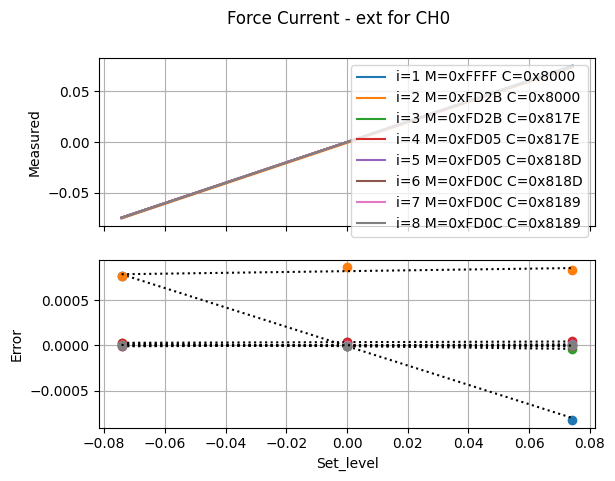

In [17]:
# test for cal
set_range = "ext"
ch = 0
points = 3
reset = True

#for debug:
p.c.com_delay = 0

fig, axs = plt.subplots(2, sharex=True)
if set_range == "v":
    fig.suptitle("Force Voltage for CH%i" % ch)
else:
    fig.suptitle("Force Current - %s for CH%i" % (set_range, ch))

if reset:
    p.reset()
    i = 1
    c_ok = False
    m_ok = False

# cal_data = pmu_cal.calibrate(p,k)

for i_iter in range(15):
    print(i)
    if set_range == "v":
        if i_iter == 0:
            reg_m = p.channels[ch].read_dac("FIN_U", "M")
            reg_c = p.channels[ch].read_dac("FIN_U", "C")
            x = p.channels[ch].read_dac("FIN_U", "M")
        elif i_iter%2 == 1:
            reg_m = pmu_cal.cal_FIN_U_M(p,k,ch)
        else:
            reg_c = pmu_cal.cal_FIN_U_C(p,k,ch)
        o, m = pmu_cal.measureFV(p, k, ch, points)
    else:
        if i_iter == 0:
            reg_m = p.channels[ch].read_dac("FIN_I_"+set_range, "M")
            reg_c = p.channels[ch].read_dac("FIN_I_"+set_range, "C")
        elif i_iter%2 == 1:
            reg_m = pmu_cal.cal_FIN_I_M(p,k,ch,set_range)
        else:
            reg_c = pmu_cal.cal_FIN_I_C(p,k,ch,set_range)
        o, m = pmu_cal.measureFI(p, k, ch, set_range, points)
        m = -m
    if i_iter > 0:
        i+=1
    
    
    if (i_iter%2 == 1):
        if abs(last_reg_m-reg_m) <= 1:
            print("\n\nM OK\n\n")
            m_ok = True
        else:
            m_ok = False
    elif i_iter>0:
        if abs(last_reg_c-reg_c) <= 1:
            print("\n\nC OK\n\n")
            c_ok = True
        else:
            c_ok = False
            
    if c_ok and m_ok:
        print("CALIBRATION OK - breaking loop")
        break
    last_reg_m = reg_m
    last_reg_c = reg_c
        
    axs[0].plot(o, m, label="i=%i M=0x%04X C=0x%04X"%(i, reg_m, reg_c))
    axs[1].plot(o, (o-m), 'o')
    b,a = np.polyfit(o, (o-m), 1)
    axs[1].plot(o, b*o+a, ':k')
    
    # axs[1].plot(o, (o-m)/o*100)

axs[0].set_ylabel("Measured")
axs[0].grid(visible=True)
axs[0].legend()
axs[1].set_xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
axs[1].set_ylabel("Error")
# axs[1].set_ylim([-1, 1])
axs[1].grid(visible=True)
plt.show()

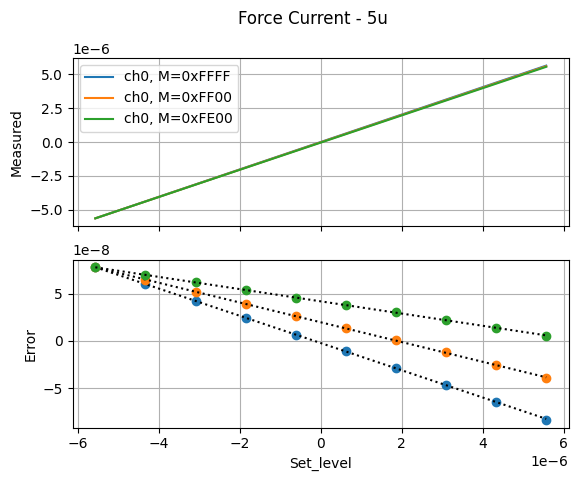

In [3]:
# test for reg-function
set_range = "5u"
ch = 0
points = 10

#for debug:
p.c.com_delay = 0
p.reset()

fig, axs = plt.subplots(2, sharex=True)
if set_range == "v":
    fig.suptitle("Force Voltage")
else:
    fig.suptitle("Force Current - %s" % set_range)

# for x in [0xFFFF, 0xFE00, 0xFC00, 0xFA00, 0xF800, 0xF600, 0xF400, 0xF200, 0xF000]:
for x in [0xFFFF, 0xFF00, 0xFE00]:
    if set_range == "v":
        p.channels[ch].write_dac(data = x, dac_reg = "FIN_U", reg = "M")
        o, m = pmu_cal.measureFV(p, k, ch, points)
    else:
        p.channels[ch].write_dac(data = x, dac_reg = "FIN_I_"+set_range, reg = "M")
        o, m = pmu_cal.measureFI(p, k, ch, set_range, points)
        m = -m
    axs[0].plot(o, m, label="ch%i, M=0x%04X"%(ch, x))
    axs[1].plot(o, (o-m), 'o', label="ch%i"%ch)
    b,a = np.polyfit(o, (o-m), 1)
    axs[1].plot(o, b*o+a, ':k')
    
    # axs[1].plot(o, (o-m)/o*100)

axs[0].set_ylabel("Measured")
axs[0].grid(visible=True)
axs[0].legend()
axs[1].set_xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
axs[1].set_ylabel("Error")
# axs[1].set_ylim([-1, 1])
axs[1].grid(visible=True)
plt.show()

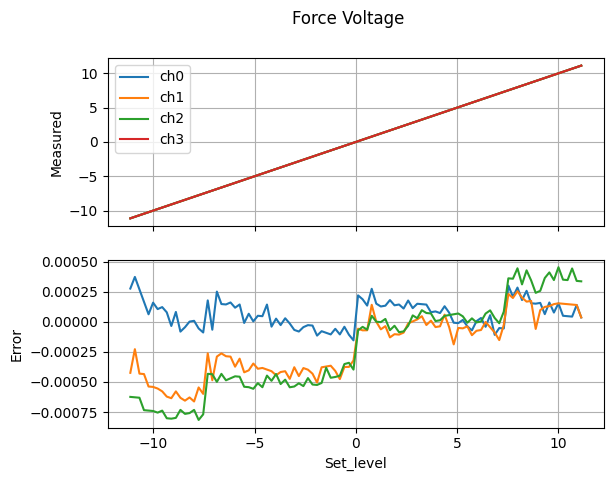

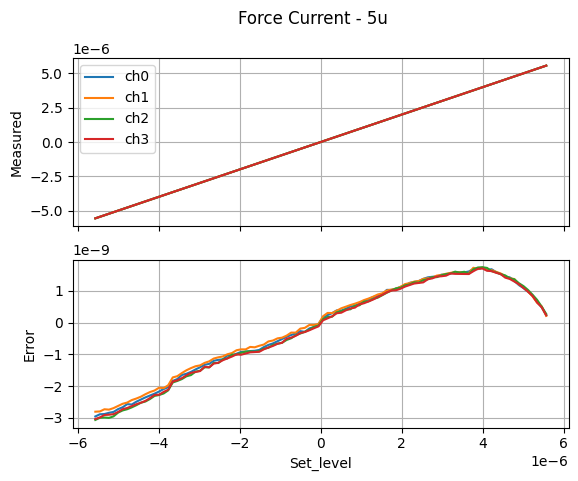

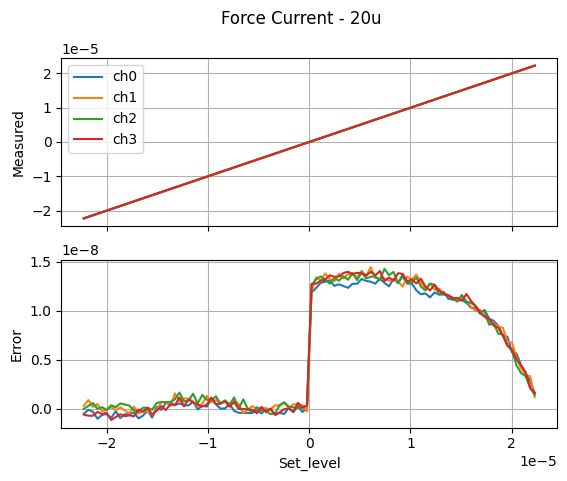

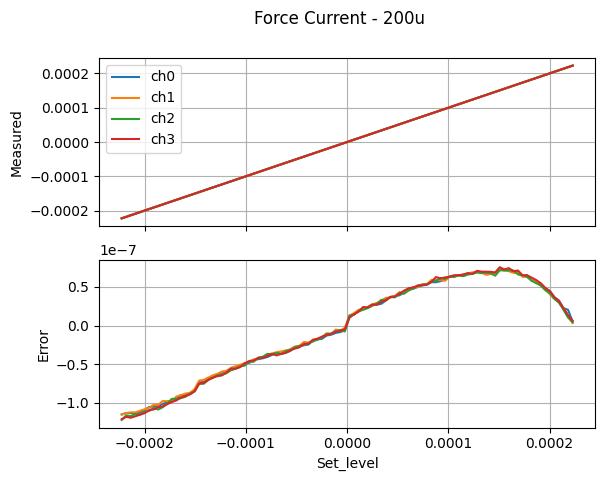

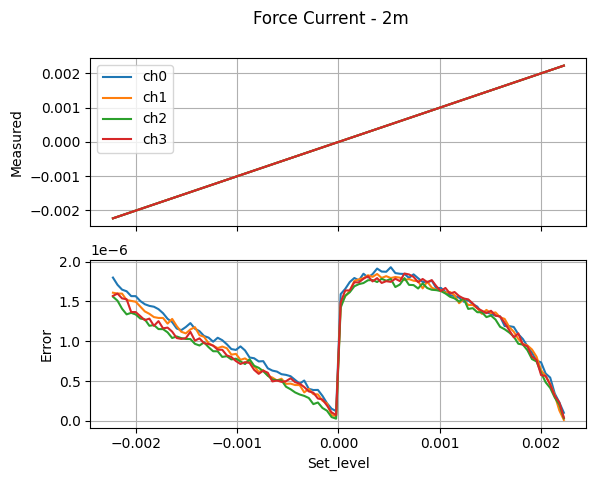

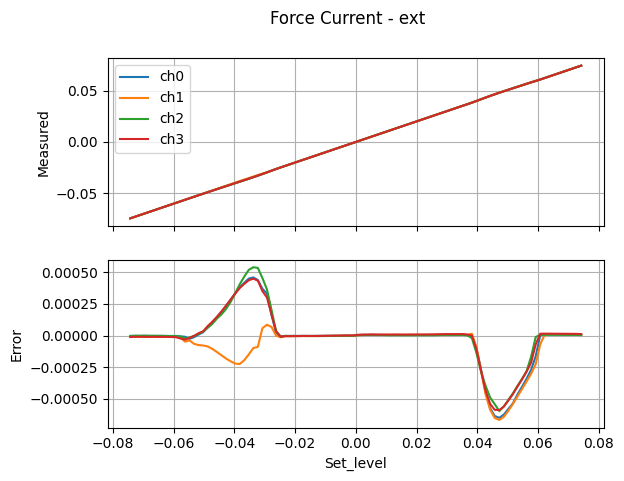

In [5]:
# FV and FI-Error with raw force voltage
p.write_all_PMU_REGS(0x1E060)
p.c.verbose = False

points = 100

# print("Measure FV")

fig, axs = plt.subplots(2, sharex=True)
fig.suptitle("Force Voltage")
for ch in range(1):
# for ch in [0]:
    
    o, m = pmu_cal.measureFV(p, k, ch, points)
    axs[0].plot(o, m, label="ch%i"%ch)
    # axs[1].plot(o, (o-m)/o*100)
    if ch != 3:
        axs[1].plot(o, (o-m), label="ch%i"%ch)

axs[0].set_ylabel("Measured")
axs[0].grid(visible=True)
axs[0].legend()
axs[1].set_xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
axs[1].set_ylabel("Error")
# axs[1].set_ylim([-1, 1])
axs[1].grid(visible=True)
plt.show()

# for i_range in pmu_def.I_RANGES:
#     fig, axs = plt.subplots(2, sharex=True)
#     fig.suptitle("Force Current - %s" % i_range)
    
#     for ch in range(4):
#     # for ch in [0]:
#         o, m = pmu_cal.measureFI(p, k, ch, i_range, points)
#         axs[0].plot(o, -m, label="ch%i"%ch)
#         # axs[1].plot(o, (o-m)/o*100)
#         axs[1].plot(o, (o+m), label="ch%i"%ch)

#     axs[0].set_ylabel("Measured")
#     axs[0].grid(visible=True)
#     axs[0].legend()
#     axs[1].set_xlabel("Set_level")
#     # axs[1].set_ylabel("Error (%)")
#     axs[1].set_ylabel("Error")
#     # axs[1].set_ylim([-1, 1])
#     axs[1].grid(visible=True)
#     plt.show()

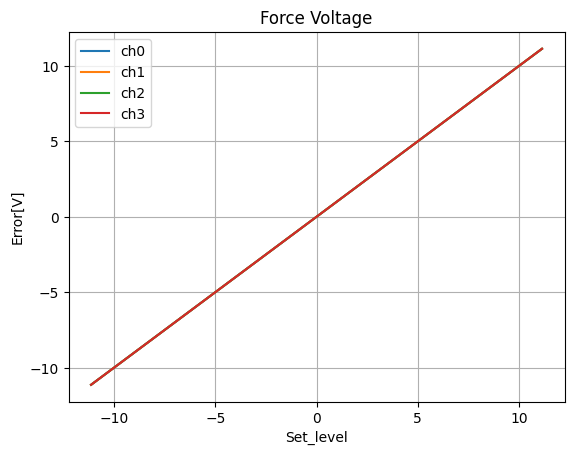

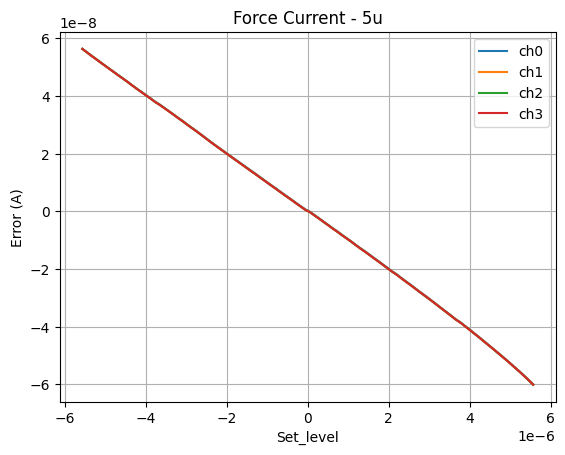

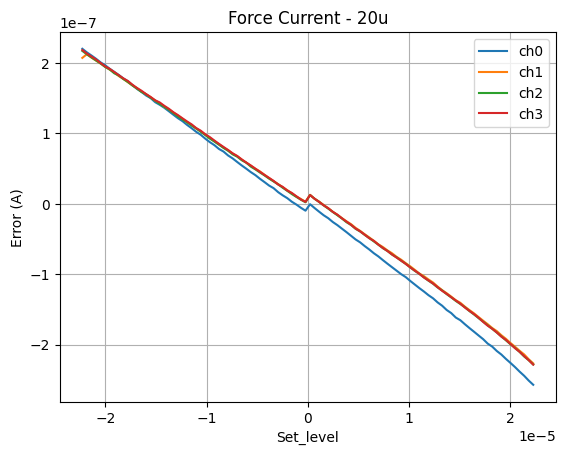

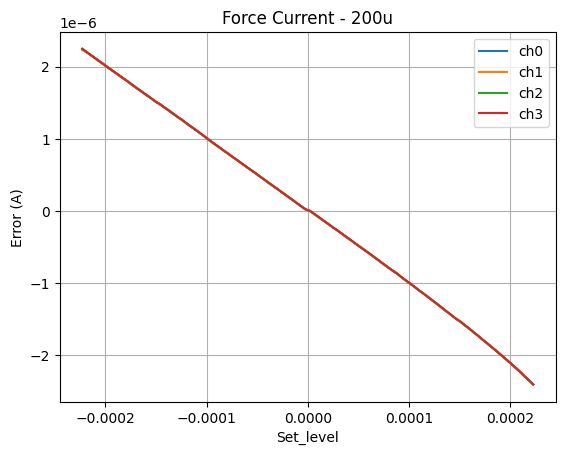

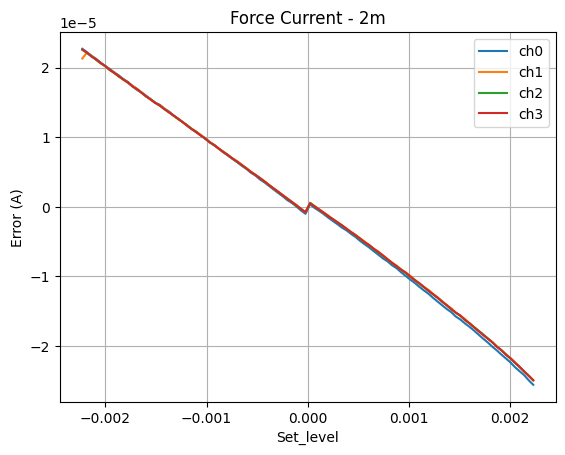

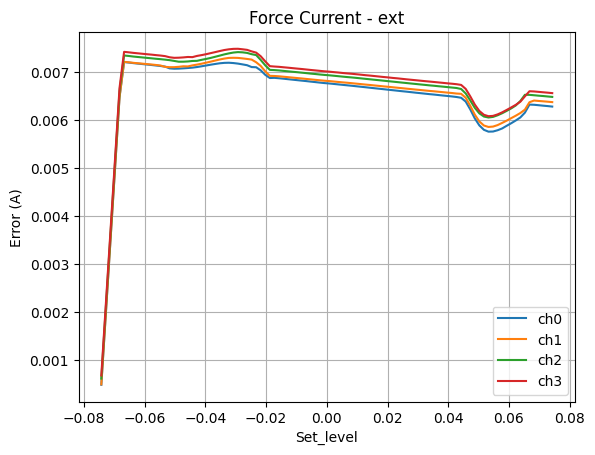

In [5]:
# FV and FI-Error
p.write_all_PMU_REGS(0x1E060)
measure_delay = 0.1

points = 100

for ch in range(4):
# for ch in [0]:    
    o, m = pmu_cal.measureFV(p, k, ch, points, measure_delay=measure_delay)

    # if ch != 3:
    #     plt.plot(o, (o-m), label="ch%i"%ch)
    plt.plot(o, (o-m), label="ch%i"%ch)

plt.title("Force Voltage")
plt.legend()
plt.xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
plt.ylabel("Error[V]")
plt.grid()
plt.show()

for i_range in pmu_def.I_RANGES:
# for i_range in ["5u"]:
    for ch in range(4):
    # for ch in [0]:
        o, m = pmu_cal.measureFI(p, k, ch, i_range, points, measure_delay=measure_delay)
        plt.plot(o, (o+m), label="ch%i"%ch)

    plt.title("Force Current - %s" % i_range)
    plt.legend()
    plt.xlabel("Set_level")
    plt.ylabel("Error (A)")
    plt.grid()
    plt.show()

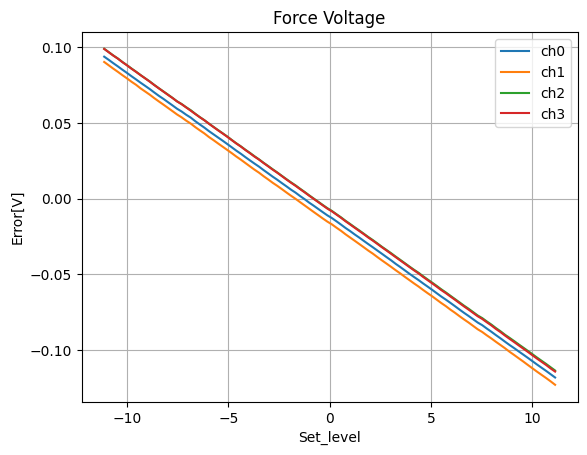

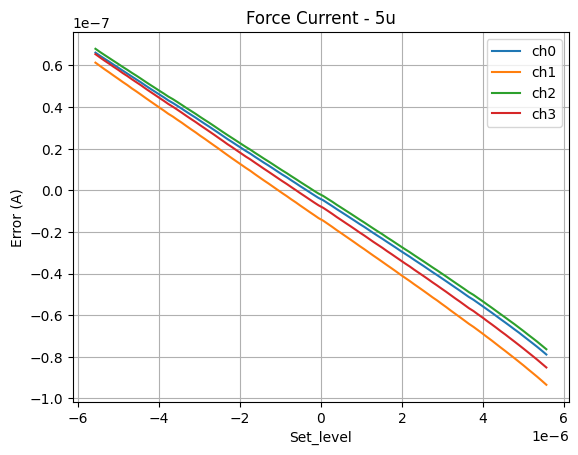

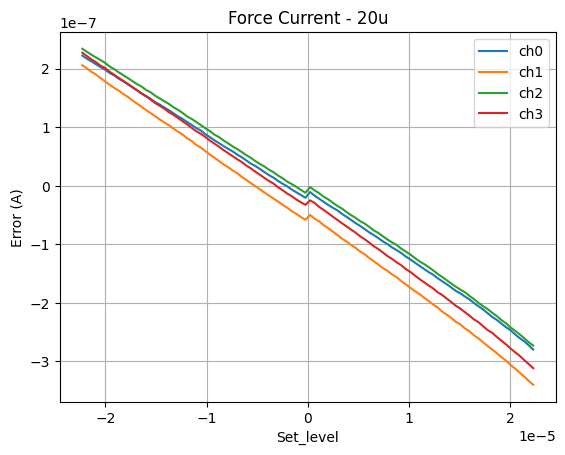

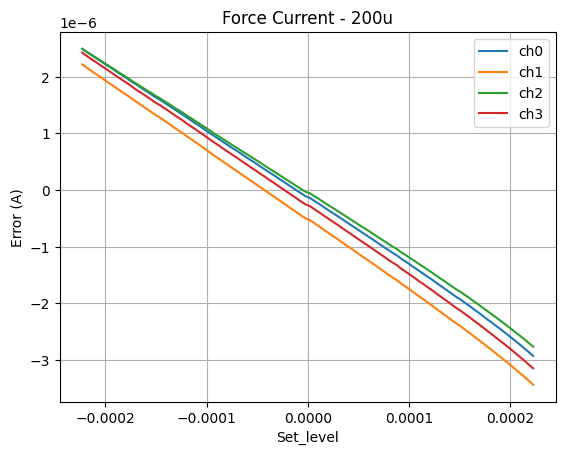

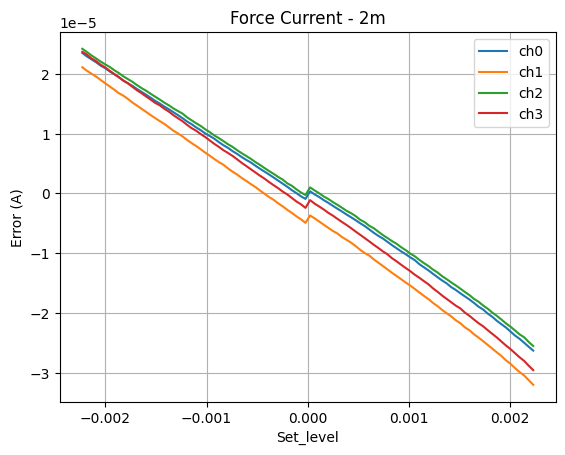

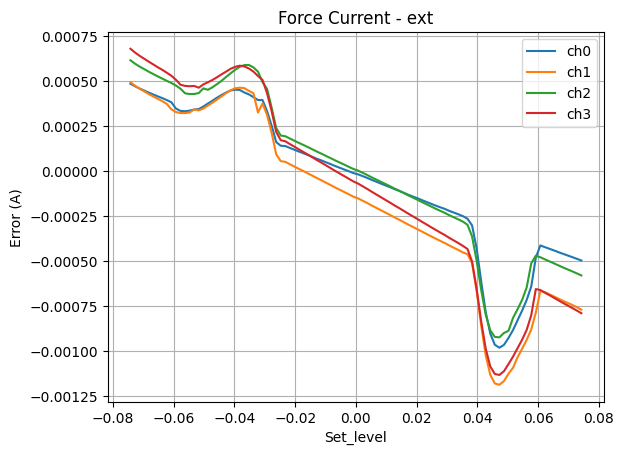

In [2]:
# FV and FI-Error Jubin
p.write_all_PMU_REGS(0x1E060)
measure_delay = 0.1

points = 100

for ch in range(4):
# for ch in [0]:    
    o, m = pmu_cal.measureFV(p, k, ch, points, measure_delay=measure_delay)

    # if ch != 3:
    #     plt.plot(o, (o-m), label="ch%i"%ch)
    plt.plot(o, (o-m), label="ch%i"%ch)

plt.title("Force Voltage")
plt.legend()
plt.xlabel("Set_level")
# axs[1].set_ylabel("Error (%)")
plt.ylabel("Error[V]")
plt.grid()
plt.show()

for i_range in pmu_def.I_RANGES:
# for i_range in ["5u"]:
    for ch in range(4):
    # for ch in [0]:
        o, m = pmu_cal.measureFI(p, k, ch, i_range, points, measure_delay=measure_delay)
        plt.plot(o, (o+m), label="ch%i"%ch)  # here we are usinh +m because measure function used is - measure in case of current
        

    plt.title("Force Current - %s" % i_range)
    plt.legend()
    plt.xlabel("Set_level")
    plt.ylabel("Error (A)")
    plt.grid()
    plt.show()

# Memory interaction

In [6]:
# create Data for Memory and write to memory

mem_wr_list = dict()
offset_val = 0xA492
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            if c_m:

                mem_wr_list[adr] = C.loc[ch, reg_name]
                # mem_list[adr] = "%i C %s" %(ch, reg_name)
            else:
                mem_wr_list[adr] = M.loc[ch, reg_name]
                # mem_list[adr] = "%i M %s" %(ch, reg_name)
        
        adr |= 0x1F
        adr -= 1
        # mem_list[adr] = X1.loc[ch, "Offset"]
        # mem_wr_list[adr] = 0xA492
        mem_wr_list[adr] = offset_val
        # mem_list[adr] = "%i offset" %(ch)

p.mem_write_data(mem_wr_list)
# mem_wr_list

In [7]:
#check if wr == rd
mem_rd_list = p.mem_read_data(list(mem_wr_list.keys())) # We are reading the elements(M and C) which are stored in the memory element of the PMU modul

for adr in mem_wr_list.keys():
    if mem_wr_list[adr] != mem_rd_list[adr]: # Comparing if the elements that are stored in the memory elements of the PMU modul and the elements in dictionary mem_wr_list(dictionary in which M and C values after calibration are stored) are same:  
        print("error @ adr %i - w=%i r=%i" % (
            adr,
            mem_wr_list[adr],   # If there is any mismatch in the M and C values, print the address and the values. Otherwise print nothing.
            mem_rd_list[adr]
        ))

In [8]:
#######################
#### caldata mem to pmu
#######################

#create adr list
adr_list = list()
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            adr_list.append(adr)
        
        adr |= 0x1F
        adr -= 1
        adr_list.append(adr)

#read data from memory
rd_cal_list = p.mem_read_data(adr_list)


#write data do dac reg
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            
            # print("ch:%i adr:%s reg:%s data:%i" %(
            #     ch,
            #     reg_name,
            #     ("C" if c_m else "M"),
            #     rd_cal_list[adr]
            # ))
            
            if c_m:
                p.channels[ch].write_dac(rd_cal_list[adr], reg_name, reg="C")
            else:
                p.channels[ch].write_dac(rd_cal_list[adr], reg_name, reg="M")
            
            sleep(0.1)
        adr |= 0x1F
        adr -= 1
        # mem_list[adr] = X1.loc[ch, "Offset"]
        p.channels[ch].write_dac(rd_cal_list[adr], "Offset")
        sleep(0.1)


In [9]:
M_recal = p.read_dac_regs(reg="M")
C_recal = p.read_dac_regs(reg="C")


In [10]:
print(M_recal)

   FIN_I_5u  FIN_I_20u  FIN_I_200u  FIN_I_2m  FIN_I_ext  FIN_U  CLL_I  CLL_U  \
0     64606      64690       64694     64744      64850  64944  64550  64920   
1     64642      64706       64700     64738      64832  64914  64554  64920   
2     64618      64694       64698     64744      64850  64946  64546  64944   
3     64650      64724       64734     64768      64916  64938  64588  64934   

   CLH_I  CLH_U  
0  64522  64946  
1  64536  64938  
2  64506  64942  
3  64534  64940  


In [ ]:
# Memory Interaction - Jubin
# Create Data for Memory and Write to Memory

mem_wr_list_jub = dict()
offset_val = 0xA492
for ch in range (4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def_jub.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            if c_m:

                mem_wr_list_jub[adr] = C.loc[ch,reg_name]
            else:

                mem_wr_list_jub[adr] = M.loc[ch,reg_name]

        adr |= 0x1F
        adr -= 1

        mem_wr_list_jub[adr] = offset_val

p.mem_write_data(mem_wr_list_jub)


In [ ]:
#check if wr == rd
mem_rd_list = p.mem_read_data(list(mem_wr_list_jub.keys())) # We are reading the elements(M and C) which are stored in the memory element of the PMU modul

for adr in mem_wr_list_jub.keys():
    if mem_wr_list_jub[adr] != mem_rd_list[adr]: # Comparing if the elements that are stored in the memory elements of the PMU modul and the elements in dictionary mem_wr_list(dictionary in which M and C values after calibration are stored) are same:  
        print("error @ adr %i - w=%i r=%i" % (
            adr,
            mem_wr_list_jub[adr],   # If there is any mismatch in the M and C values, print the address and the values. Otherwise print nothing.
            mem_rd_list[adr]
        ))

In [ ]:
# Writing the Elements from Memory to PMU

#######################
#### caldata mem to pmu
#######################

#create adr list
adr_list = list()   # Just creating an address list without the elements named as adr_list , we are doing this to read the elemts that are stored in the address because without adress  we are just readig random elements.
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            adr_list.append(adr)
        
        adr |= 0x1F
        adr -= 1
        adr_list.append(adr)

#read data from memory
rd_cal_list = p.mem_read_data(adr_list)  # Now we are reading the elements(with the help of address list created) and transferring it to rd_cal_list


#write data do dac reg
for ch in range(4):
    for c_m in range(2):
        for i, reg_name in enumerate(list(pmu_def.DAC_REG_TABLE.keys())[1:]):
            adr = 0
            adr |= ch << 6
            adr |= c_m << 5
            adr |= i << 1
            
            # print("ch:%i adr:%s reg:%s data:%i" %(
            #     ch,
            #     reg_name,
            #     ("C" if c_m else "M"),
            #     rd_cal_list[adr]
            # ))
            
            if c_m:
                p.channels[ch].write_dac(rd_cal_list[adr], reg_name, reg="C")
            else:
                p.channels[ch].write_dac(rd_cal_list[adr], reg_name, reg="M")   # Now we are writing the elements from rd_cal_list to the M and C Register of the PMU (with the help of the address list)
            
            sleep(0.1)
        adr |= 0x1F
        adr -= 1
        # mem_list[adr] = X1.loc[ch, "Offset"]
        p.channels[ch].write_dac(rd_cal_list[adr], "Offset")  # now we are writing the offset value also from rd_cal_list to the PMU
        sleep(0.1)


In [ ]:
M_recal = p.read_dac_regs(reg="M")
C_recal = p.read_dac_regs(reg="C")


In [ ]:
print(M_recal)

In [ ]:
# FV and  FI Error Graph Jubin
p.write_all_PMU_REGS(0x1E060)
measure_delay = 0.1

points = 100

for ch in range(4):
    
    o,m = pmu_calc_jub.measureFV(p,k,ch,points,measure_delay=measure_delay)  # o is the measured value and m is the ideal value according to the datasheet equation
    plt.plot(o, (o-m), "ch%i"%ch)

plt.title("Force Voltage")
plt.legend()
plt.xlabel("Set_Input")
plt.ylabel("Error[V]")
plt.grid()
plt.show()

for i_range in pmu_def_jub.I_RANGES:
# for i_range in ["5u"]:
    for ch in range(4):
    # for ch in [0]:
        o, m = pmu_cal_jub.measureFI(p, k, ch, i_range, points, measure_delay=measure_delay)
        plt.plot(o, (o+m), label="ch%i"%ch)  # here we are usinh +m because measure function used is - measure in case of current
        

    plt.title("Force Current - %s" % i_range)
    plt.legend()
    plt.xlabel("Set_Input")
    plt.ylabel("Error (A)")
    plt.grid()
    plt.show()



In [ ]:
# Voltage Clamp Test Measure- Jubin

num = 100
ol=0.1
measure_delay = 0.1

for ch in range(4):
# for ch in [0]:
    for r in pmu_def_jub.I_RANGES:
    # for r in ["2m"]:

        set_vh ,meas_vh = pmu_cal_jub.measureCL_U(p, k, ch, r, clamp_side='H', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vh, (set_vh-meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal_jub.measureCL_U(p, k, ch, r, clamp_side='L', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vl, (set_vl-meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-I - V-Clamp - CH%i" % ch)
    plt.xlabel("Set_V [V]")
    plt.ylabel("Error")
    plt.legend()

    plt.show()

In [ ]:
# Current Clamp Test Measure - Jubin
num = 100
measure_delay = 0.1
ol = 0.1
voltage=5

rel_max = True

for ch in range(4):
# for ch in [0]:
    # for r in pmu_def.I_RANGES:
    # for r in pmu_def.I_RANGES[:-1]:
    # for r in ["20u"]:
    for r in ["ext"]:
        max_val = pmu_def_jub.CURRENT_RANGES[r]["MaxVal"]
        
        set_vh ,meas_vh = pmu_cal_jub.measureCL_I(p, k, ch, r, clamp_side='H', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vh = set_vh/max_val
            meas_vh = meas_vh/max_val
        plt.plot(set_vh, (set_vh+meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal_jub.measureCL_I(p, k, ch, r, clamp_side='L', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vl = set_vl/max_val
            meas_vl = meas_vl/max_val
        plt.plot(set_vl, (set_vl+meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-V - I-Clamp - CH%i" % ch)
    plt.xlabel("Set_I / MaxVal(I_range)")
    plt.ylabel("Error (meas / max)")
    plt.legend()

    plt.show()

# test for Clamps

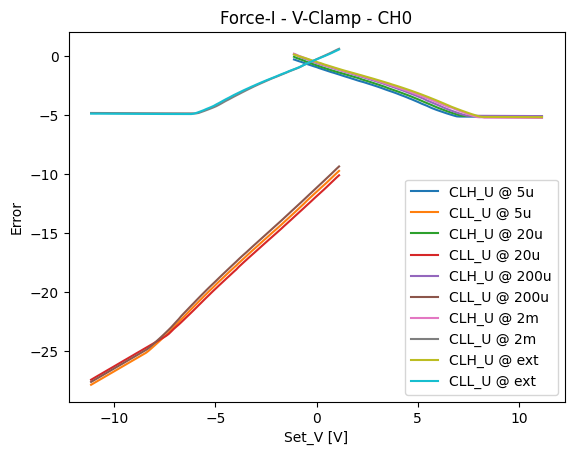

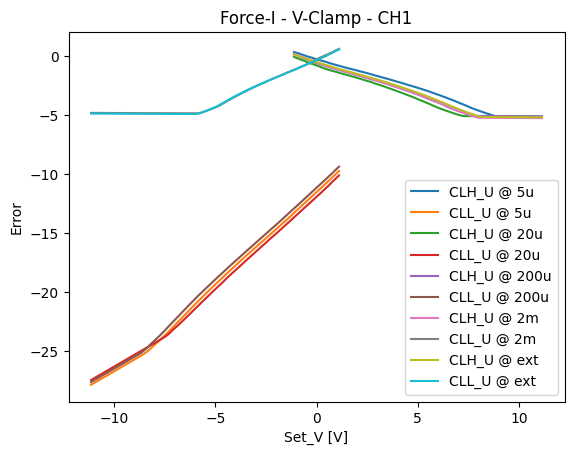

KeyboardInterrupt: 

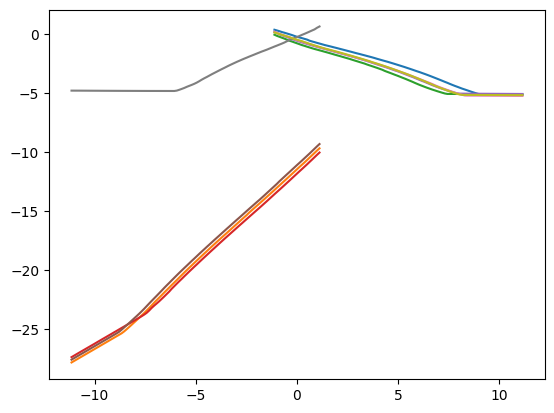

In [2]:
# voltage clamp
num = 100
ol=0.1
measure_delay = 0.1

for ch in range(4):
# for ch in [0]:
    for r in pmu_def.I_RANGES:
    # for r in ["2m"]:

        set_vh ,meas_vh = pmu_cal.measureCL_U(p, k, ch, r, clamp_side='H', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vh, (set_vh-meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal.measureCL_U(p, k, ch, r, clamp_side='L', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vl, (set_vl-meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-I - V-Clamp - CH%i" % ch)
    plt.xlabel("Set_V [V]")
    plt.ylabel("Error")
    plt.legend()

    plt.show()

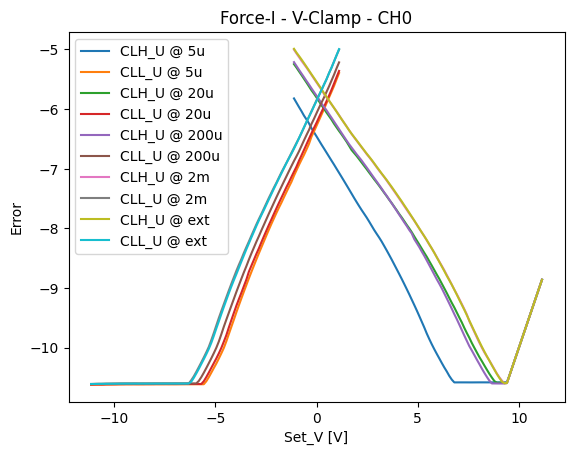

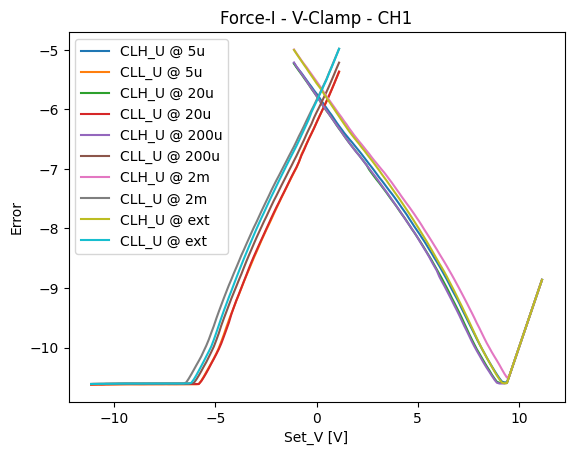

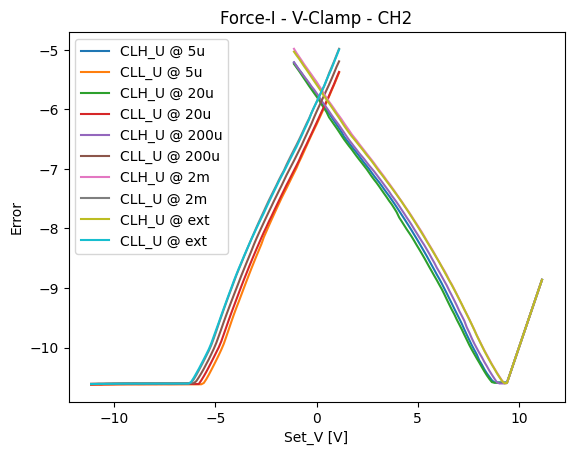

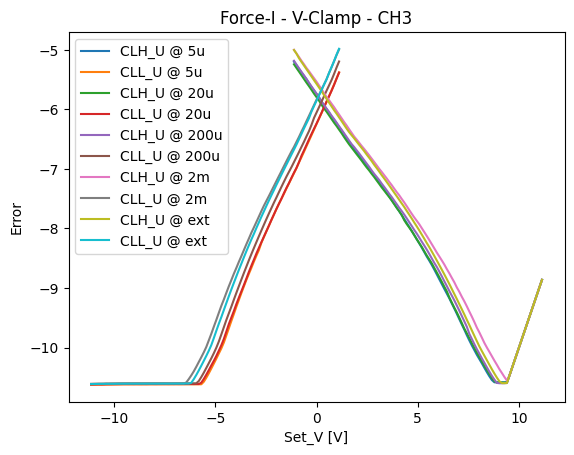

In [3]:
# voltage clamp - Jubin
num = 100
ol=0.1
measure_delay = 0.1

for ch in range(4):
# for ch in [0]:
    for r in pmu_def.I_RANGES:
    # for r in ["2m"]:

        set_vh ,meas_vh = pmu_cal.measureCL_U(p, k, ch, r, clamp_side='H', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vh, (set_vh-meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal.measureCL_U(p, k, ch, r, clamp_side='L', num=num, overlap=ol, measure_delay=measure_delay)
        plt.plot(set_vl, (set_vl-meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-I - V-Clamp - CH%i" % ch)
    plt.xlabel("Set_V [V]")
    plt.ylabel("Error")
    plt.legend()

    plt.show()

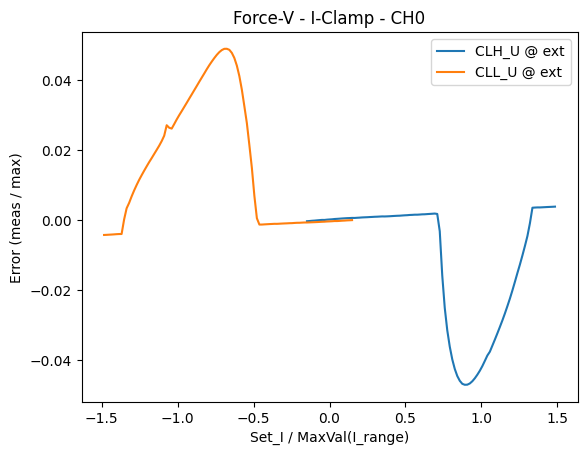

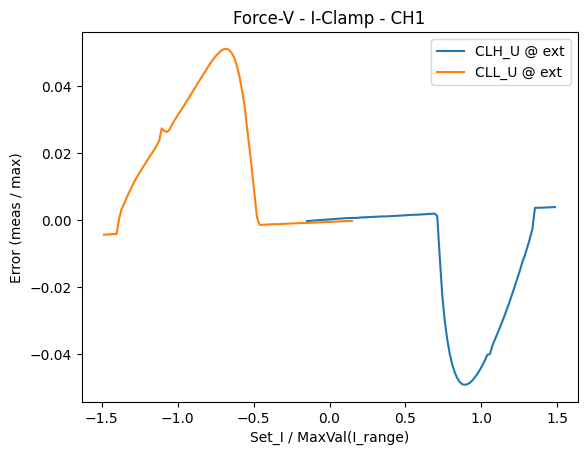

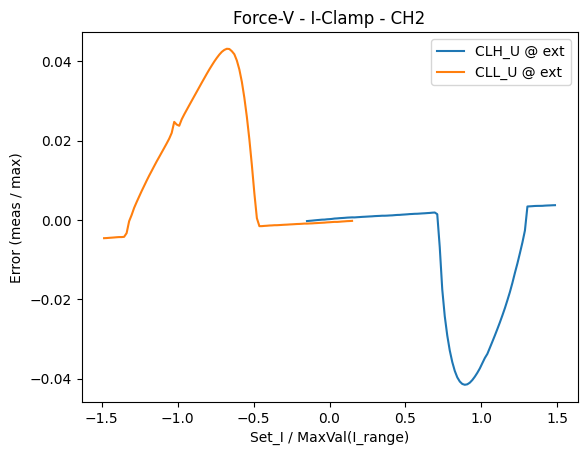

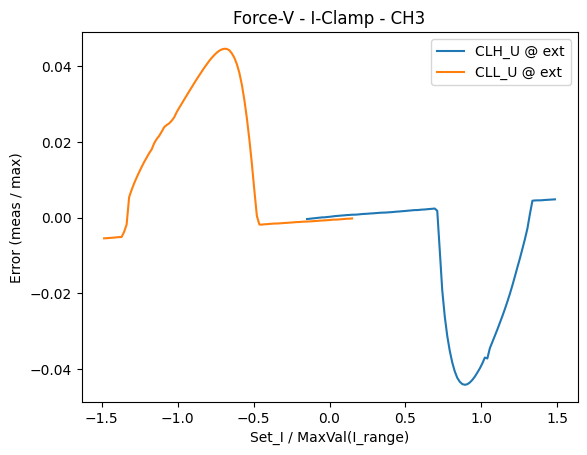

In [7]:
# current clamp ext
num = 100
measure_delay = 0.1
ol = 0.1
voltage=5

rel_max = True

for ch in range(4):
# for ch in [0]:
    # for r in pmu_def.I_RANGES:
    # for r in pmu_def.I_RANGES[:-1]:
    # for r in ["20u"]:
    for r in ["ext"]:
        max_val = pmu_def.CURRENT_RANGES[r]["MaxVal"]
        
        set_vh ,meas_vh = pmu_cal.measureCL_I(p, k, ch, r, clamp_side='H', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vh = set_vh/max_val
            meas_vh = meas_vh/max_val
        plt.plot(set_vh, (set_vh+meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal.measureCL_I(p, k, ch, r, clamp_side='L', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vl = set_vl/max_val
            meas_vl = meas_vl/max_val
        plt.plot(set_vl, (set_vl+meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-V - I-Clamp - CH%i" % ch)
    plt.xlabel("Set_I / MaxVal(I_range)")
    plt.ylabel("Error (meas / max)")
    plt.legend()

    plt.show()

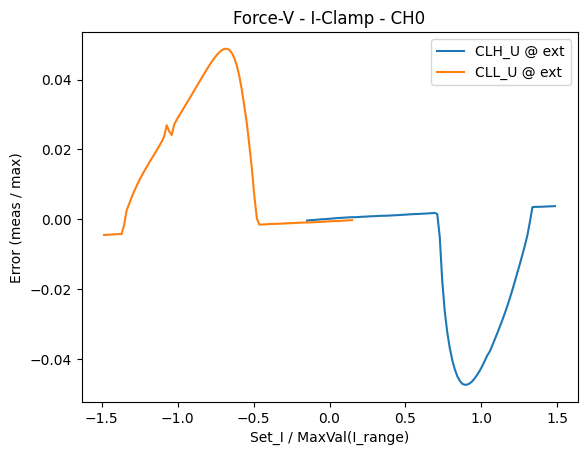

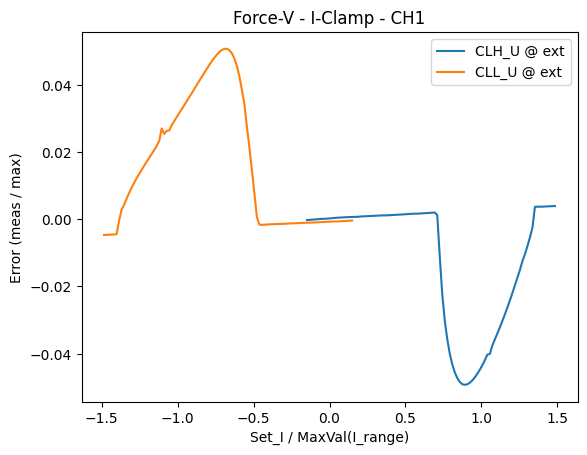

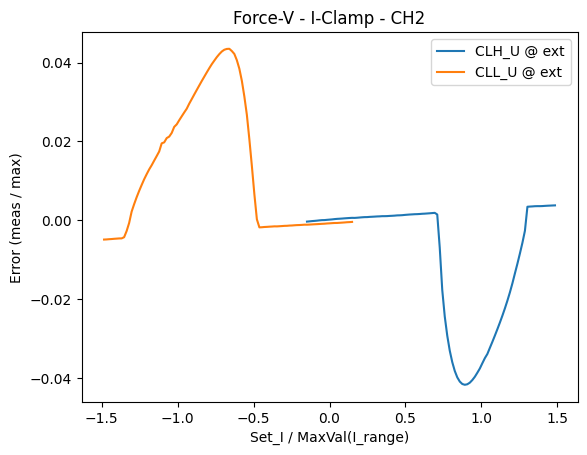

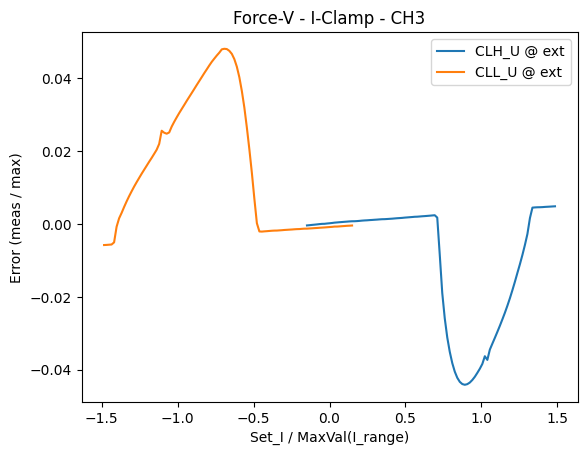

In [7]:
# current clamp ext - Jubin
num = 100
measure_delay = 0.1
ol = 0.1
voltage=5

rel_max = True

for ch in range(4):
# for ch in [0]:
    # for r in pmu_def.I_RANGES:
    # for r in pmu_def.I_RANGES[:-1]:
    # for r in ["20u"]:
    for r in ["ext"]:
        max_val = pmu_def.CURRENT_RANGES[r]["MaxVal"]
        
        set_vh ,meas_vh = pmu_cal.measureCL_I(p, k, ch, r, clamp_side='H', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vh = set_vh/max_val
            meas_vh = meas_vh/max_val
        plt.plot(set_vh, (set_vh+meas_vh), label="CLH_U @ %s" % r)
        
        set_vl ,meas_vl = pmu_cal.measureCL_I(p, k, ch, r, clamp_side='L', voltage=voltage, overlap=ol, num=num, measure_delay=measure_delay)
        if rel_max:
            set_vl = set_vl/max_val
            meas_vl = meas_vl/max_val
        plt.plot(set_vl, (set_vl+meas_vl), label="CLL_U @ %s" % r)

    plt.title("Force-V - I-Clamp - CH%i" % ch)
    plt.xlabel("Set_I / MaxVal(I_range)")
    plt.ylabel("Error (meas / max)")
    plt.legend()

    plt.show()

CLL_I_M CALIBRATION for channel 0 @ 2mA
	NEW_CLL_I_M = CLL_I_M * ((I_HIGH_SET / I_HIGH_MEAS) + 1) / 2
	63358 = 65534 * ((-2.228 mA / -2.386 mA) + 1) / 2
	I_MAX after Cal = -2.386 mA
CLL_I_C CALIBRATION for channel 0 @ 2mA
	NEW_CLL_I_C = CLL_I_C - (Zero_offset / LSB)
	35735 = 32768 - (-201.663 µA / 67.978 nA)
	Offset after Cal = 3.055 µA
CLL_I_M CALIBRATION for channel 0 @ 2mA
	NEW_CLL_I_M = CLL_I_M * ((I_HIGH_SET / I_HIGH_MEAS) + 1) / 2
	64029 = 63358 * ((-2.228 mA / -2.181 mA) + 1) / 2
	I_MAX after Cal = -2.181 mA
CLL_I_C CALIBRATION for channel 0 @ 2mA
	NEW_CLL_I_C = CLL_I_C - (Zero_offset / LSB)
	35350 = 35735 - (26.185 µA / 67.978 nA)
	Offset after Cal = -384.931 nA
CLL_I_M CALIBRATION for channel 0 @ 2mA
	NEW_CLL_I_M = CLL_I_M * ((I_HIGH_SET / I_HIGH_MEAS) + 1) / 2
	64312 = 64028 * ((-2.228 mA / -2.208 mA) + 1) / 2
	I_MAX after Cal = -2.208 mA
CLL_I_C CALIBRATION for channel 0 @ 2mA
	NEW_CLL_I_C = CLL_I_C - (Zero_offset / LSB)
	35211 = 35350 - (9.420 µA / 67.978 nA)
	Offset after 

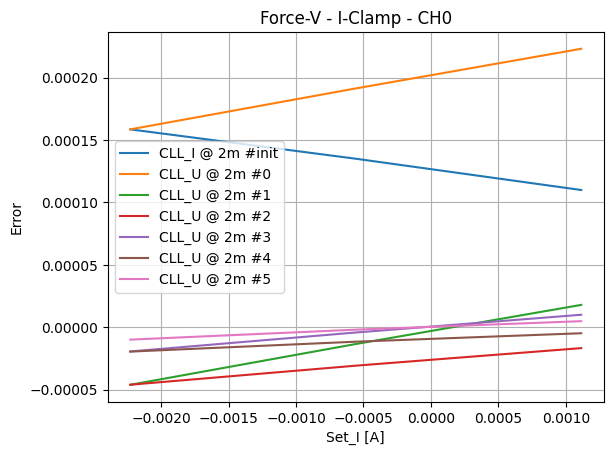

In [6]:
#Clamp Calibration
ch = 0
r  = "2m"
cs = "L"
num = 3


p.channels[ch].write_dac(0xffff, "CL%s_I" % cs, "M")
p.channels[ch].write_dac(0x8000, "CL%s_I" % cs, "C")


set_vh ,meas_vh = pmu_cal.measureCL_I(p, k, ch, r, clamp_side=cs, num=num)
plt.plot(set_vh, (set_vh+meas_vh), label="CL%s_I @ %s #init" % (cs, r))

# p.channels[ch].write_dac(0xfC00, "CLH_I", "M")
# p.channels[ch].write_dac(0x7a40, "CLH_I", "C")
for i in range(3):
    pmu_cal.cal_CL_I_M(p,k,ch,r,cs)
    set_vh ,meas_vh = pmu_cal.measureCL_I(p, k, ch, r, clamp_side=cs, num=num)
    plt.plot(set_vh, (set_vh+meas_vh), label="CL%s_U @ %s #%i" % (cs, r, (i*2)))
    
    pmu_cal.cal_CL_I_C(p,k,ch,r,cs)
    set_vh ,meas_vh = pmu_cal.measureCL_I(p, k, ch, r, clamp_side=cs, num=num)
    plt.plot(set_vh, (set_vh+meas_vh), label="CL%s_U @ %s #%i" % (cs, r, (i*2)+1))

    # r = "200u"
    # set_vh ,meas_vh = pmu_cal.measureCL_I(p, k, ch, r, clamp_side=cs, num=num)
    # plt.plot(set_vh, (set_vh+meas_vh), label="CLH_U @ %s #1" % (r))

plt.title("Force-V - I-Clamp - CH%i" % ch)
plt.xlabel("Set_I [A]")
plt.ylabel("Error")
plt.legend()
plt.grid()

plt.show()

In [24]:
k.play_chord(notes=("F#5", "G#5", "A5", "B5", "C#5", "D5", "E5"), durations=0.1)
k.display.screen = k.display.USER
k.display.clear()
k.display.settext("$BDONE$N")
# p.reset()